# Generate all figures

All generated figures are saved to `figures`.

## To do
- Add remaining figures
- Clean up plotting object
- Add docstrings and comments
- Add figure references (will wait until paper is published)

## Import all requirements

In [3]:
%%capture
%load_ext autoreload
%autoreload 2

from src import classify_edges
from src.export import export_graphs
from src.figures import uniform_growth

# Classify connections as 'stable', 'developmentally dynamic', or 'variable'.
edge_classifications, edge_pair_classifications = classify_edges.classify_edges()

## Volumetric models

1. Export models from [VAST](https://doi.org/10.3389/fncir.2018.00088) to .obj files.
2. Run `src/volumetric_models/zbrush_smooth.py` to create a script for ZBrush.
3. In Zbrush, under Zscript/Load, open the script generate above named "zbrush_script.txt".
4. Press "H" to show loaded scripts, then click the button "SmoothObjects" to run the smoothing.
5. In [Blender ](https://www.blender.org/), import the smoothed models using `src/volumetric_models/blender_import.py`

![volumetric model](figures/volumetric_models/3D_model_Dataset8.png)

## Connectome networks

1. Export graphs into a graphml format using `export.export_graphs_for_cytoscape`.
2. Import the graphs into cytoscape. 
3. Set the node and edge parameters as you see fit.

In [4]:
save_to = 'figures/exports'
export_graphs.export_graphs_for_cytoscape(save_to, edge_classifications)

x range: -0.02023019527209274 0.03457753594939801
y range: -1.7253534211408061 2.1517340229500017
Saved to `figures/exports/graphs_for_cytoscape.graphml`


## Uniform neurite growth maintains brain geometry

Saved to `figures/uniform_growth/_cable_length`:


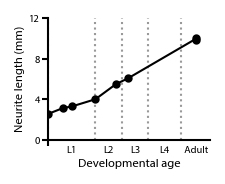

2.54 -> 9.99
Mean increase: 4.79 +- 3.88
Saved to `figures/uniform_growth/_stable_contacts`:


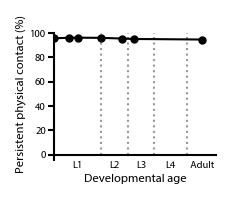

Saved to `figures/uniform_growth/_number_of_synapses`:


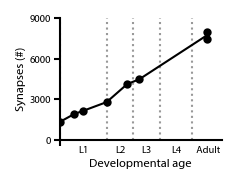

1296.00 -> 7970.00
Mean factor: 3.33 +- 3.35
Saved to `figures/uniform_growth/_synapse_density`:


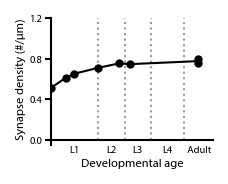

In [35]:
fig = uniform_growth.Figure('figures/uniform_growth')

fig.cable_length('')
fig.proportion_of_stable_contacts('')
fig.number_of_synapses('')
fig.synapse_density('')

## Non-uniform synapse addition reshapes the connectome

## Isogenic individuals have both stereotyped and variable connections

## Variable connections are not uniformly distributed among cell types

## Interneuron connections are stable during maturation

## Increase in both feedforward signal flow across maturation

## Increase in modularity across maturation